<a href="https://colab.research.google.com/github/Kevincancino26/Challenge-Telecom-X-an-lisis-de-evacion-de-clientes/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas a usar en el analisis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#📌 Extracción

In [2]:
url='https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df=pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
df.tail()

,customerID,Churn,customer,phone,internet,account
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7266,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [6]:
df_normalizado_customer = pd.json_normalize(
    data=df.to_dict(orient='records'),
    record_path=None,
    meta=['customerID', 'Churn'],
    errors='ignore'  #Si por alguna razón no encuentra alguna clave mencionada en meta, no lances un error. Solo ignora ese campo.
)

nuevos_nombres = {
    'customer.gender': 'genero del cliente',
    'customer.SeniorCitizen': 'cliente senior',
    'customer.Partner': 'cliente con pareja',
    'customer.Dependents': 'cliente con dependientes',
    'phone.PhoneService': 'cliente con servicio telefonico',
    'phone.MultipleLines': 'cliente con multiples lineas',
    'internet.InternetService': 'servicio de internet',
    'internet.OnlineSecurity': 'seguridad en linea',
    'internet.OnlineBackup': 'backup en linea',
    'internet.DeviceProtection': 'proteccion de dispositivo',
    'internet.TechSupport': 'soporte tecnico',
    'internet.StreamingTV': 'streaming tv',
    'internet.StreamingMovies': 'streaming movies',
    'account.Contract': 'Tipo de contrato',
    'account.PaperlessBilling': 'Facturacion en linea',
    'account.PaymentMethod': 'Metodo de pago',
    'account.Charges.Monthly': 'costo mensual',
    'account.Charges.Total': 'costo total',
    'customer.tenure':'Meses de contrato del cliente'
}

df_normalizado_customer=df_normalizado_customer.rename(columns=nuevos_nombres)
df_normalizado_customer.head()

,customerID,Churn,genero del cliente,cliente senior,cliente con pareja,cliente con dependientes,Meses de contrato del cliente,cliente con servicio telefonico,cliente con multiples lineas,servicio de internet,...,backup en linea,proteccion de dispositivo,soporte tecnico,streaming tv,streaming movies,Tipo de contrato,Facturacion en linea,Metodo de pago,costo mensual,costo total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
colums_df=list(df_normalizado_customer.columns)
colums_df

['customerID',
 'Churn',
 'genero del cliente',
 'cliente senior',
 'cliente con pareja',
 'cliente con dependientes',
 'Meses de contrato del cliente',
 'cliente con servicio telefonico',
 'cliente con multiples lineas',
 'servicio de internet',
 'seguridad en linea',
 'backup en linea',
 'proteccion de dispositivo',
 'soporte tecnico',
 'streaming tv',
 'streaming movies',
 'Tipo de contrato',
 'Facturacion en linea',
 'Metodo de pago',
 'costo mensual',
 'costo total']

In [8]:
df_normalizado_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customerID                       7267 non-null   object 
 1   Churn                            7267 non-null   object 
 2   genero del cliente               7267 non-null   object 
 3   cliente senior                   7267 non-null   int64  
 4   cliente con pareja               7267 non-null   object 
 5   cliente con dependientes         7267 non-null   object 
 6   Meses de contrato del cliente    7267 non-null   int64  
 7   cliente con servicio telefonico  7267 non-null   object 
 8   cliente con multiples lineas     7267 non-null   object 
 9   servicio de internet             7267 non-null   object 
 10  seguridad en linea               7267 non-null   object 
 11  backup en linea                  7267 non-null   object 
 12  proteccion de dispos

In [9]:
df_normalizado_customer['costo total']=df_normalizado_customer['costo total'].replace(' ',0.0)
df_normalizado_customer['costo total']=df_normalizado_customer['costo total'].astype(np.float64)

In [10]:
df_normalizado_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customerID                       7267 non-null   object 
 1   Churn                            7267 non-null   object 
 2   genero del cliente               7267 non-null   object 
 3   cliente senior                   7267 non-null   int64  
 4   cliente con pareja               7267 non-null   object 
 5   cliente con dependientes         7267 non-null   object 
 6   Meses de contrato del cliente    7267 non-null   int64  
 7   cliente con servicio telefonico  7267 non-null   object 
 8   cliente con multiples lineas     7267 non-null   object 
 9   servicio de internet             7267 non-null   object 
 10  seguridad en linea               7267 non-null   object 
 11  backup en linea                  7267 non-null   object 
 12  proteccion de dispos

In [11]:
for col in df_normalizado_customer.columns:
  print(col)
  print(df_normalizado_customer[col].unique())

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
['No' 'Yes' '']
genero del cliente
['Female' 'Male']
cliente senior
[0 1]
cliente con pareja
['Yes' 'No']
cliente con dependientes
['Yes' 'No']
Meses de contrato del cliente
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
cliente con servicio telefonico
['Yes' 'No']
cliente con multiples lineas
['No' 'Yes' 'No phone service']
servicio de internet
['DSL' 'Fiber optic' 'No']
seguridad en linea
['No' 'Yes' 'No internet service']
backup en linea
['Yes' 'No' 'No internet service']
proteccion de dispositivo
['No' 'Yes' 'No internet service']
soporte tecnico
['Yes' 'No' 'No internet service']
streaming tv
['Yes' 'No' 'No internet service']
streaming movies
['No' 'Yes' 'No internet service']
Tipo de contrato
['One year' 

In [12]:
df_normalizado_customer.isnull().sum()

,0
customerID,0
Churn,0
genero del cliente,0
cliente senior,0
cliente con pareja,0
cliente con dependientes,0
Meses de contrato del cliente,0
cliente con servicio telefonico,0
cliente con multiples lineas,0
servicio de internet,0


In [13]:
(df_normalizado_customer == ' ').sum()

,0
customerID,0
Churn,0
genero del cliente,0
cliente senior,0
cliente con pareja,0
cliente con dependientes,0
Meses de contrato del cliente,0
cliente con servicio telefonico,0
cliente con multiples lineas,0
servicio de internet,0


In [14]:
(df_normalizado_customer == '').sum()

,0
customerID,0
Churn,224
genero del cliente,0
cliente senior,0
cliente con pareja,0
cliente con dependientes,0
Meses de contrato del cliente,0
cliente con servicio telefonico,0
cliente con multiples lineas,0
servicio de internet,0


In [15]:
df_normalizado_customer['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [16]:
df_normalizado_customer['Churn']=df_normalizado_customer['Churn'].replace('','unkown')

In [17]:
df_normalizado_customer['Churn'].unique()

array(['No', 'Yes', 'unkown'], dtype=object)

In [18]:
(df_normalizado_customer == '').sum()

,0
customerID,0
Churn,0
genero del cliente,0
cliente senior,0
cliente con pareja,0
cliente con dependientes,0
Meses de contrato del cliente,0
cliente con servicio telefonico,0
cliente con multiples lineas,0
servicio de internet,0


In [19]:
for col in df_normalizado_customer.select_dtypes(include='object').columns:
  df_normalizado_customer[col]=df_normalizado_customer[col].str.lower().str.strip()

In [20]:
df_normalizado_customer.head()

,customerID,Churn,genero del cliente,cliente senior,cliente con pareja,cliente con dependientes,Meses de contrato del cliente,cliente con servicio telefonico,cliente con multiples lineas,servicio de internet,...,backup en linea,proteccion de dispositivo,soporte tecnico,streaming tv,streaming movies,Tipo de contrato,Facturacion en linea,Metodo de pago,costo mensual,costo total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40


In [21]:
df_normalizado_customer['costos diarios']=df_normalizado_customer['costo mensual']/30


##Tabla modificada (opncional)

In [22]:
df_datos_modificados=df_normalizado_customer.copy()

In [23]:
df_normalizado_customer['costo total']=df_normalizado_customer['costo total'].replace(' ',0.0)
df_datos_modificados=df_datos_modificados.replace('no','1').replace('yes','0')


In [24]:
df_datos_modificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customerID                       7267 non-null   object 
 1   Churn                            7267 non-null   object 
 2   genero del cliente               7267 non-null   object 
 3   cliente senior                   7267 non-null   int64  
 4   cliente con pareja               7267 non-null   object 
 5   cliente con dependientes         7267 non-null   object 
 6   Meses de contrato del cliente    7267 non-null   int64  
 7   cliente con servicio telefonico  7267 non-null   object 
 8   cliente con multiples lineas     7267 non-null   object 
 9   servicio de internet             7267 non-null   object 
 10  seguridad en linea               7267 non-null   object 
 11  backup en linea                  7267 non-null   object 
 12  proteccion de dispos

In [25]:
for col in df_datos_modificados.columns:
  if set(df_datos_modificados[col].unique())== {'0', '1'}:
    df_datos_modificados[col]=df_datos_modificados[col].astype(np.int64)



In [26]:
df_datos_modificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customerID                       7267 non-null   object 
 1   Churn                            7267 non-null   object 
 2   genero del cliente               7267 non-null   object 
 3   cliente senior                   7267 non-null   int64  
 4   cliente con pareja               7267 non-null   int64  
 5   cliente con dependientes         7267 non-null   int64  
 6   Meses de contrato del cliente    7267 non-null   int64  
 7   cliente con servicio telefonico  7267 non-null   int64  
 8   cliente con multiples lineas     7267 non-null   object 
 9   servicio de internet             7267 non-null   object 
 10  seguridad en linea               7267 non-null   object 
 11  backup en linea                  7267 non-null   object 
 12  proteccion de dispos

#📊 Carga y análisis

In [27]:
df_normalizado_customer.describe().round(2)

,cliente senior,Meses de contrato del cliente,costo mensual,costo total,costos diarios
count,7267.00,7267.00,7267.00,7267.00,7267.00
mean,0.16,32.35,64.72,2277.18,2.16
std,0.37,24.57,30.13,2268.65,1.00
min,0.00,0.00,18.25,0.00,0.61
25%,0.00,9.00,35.42,396.20,1.18
50%,0.00,29.00,70.30,1389.20,2.34
75%,0.00,55.00,89.88,3778.52,3.00
max,1.00,72.00,118.75,8684.80,3.96


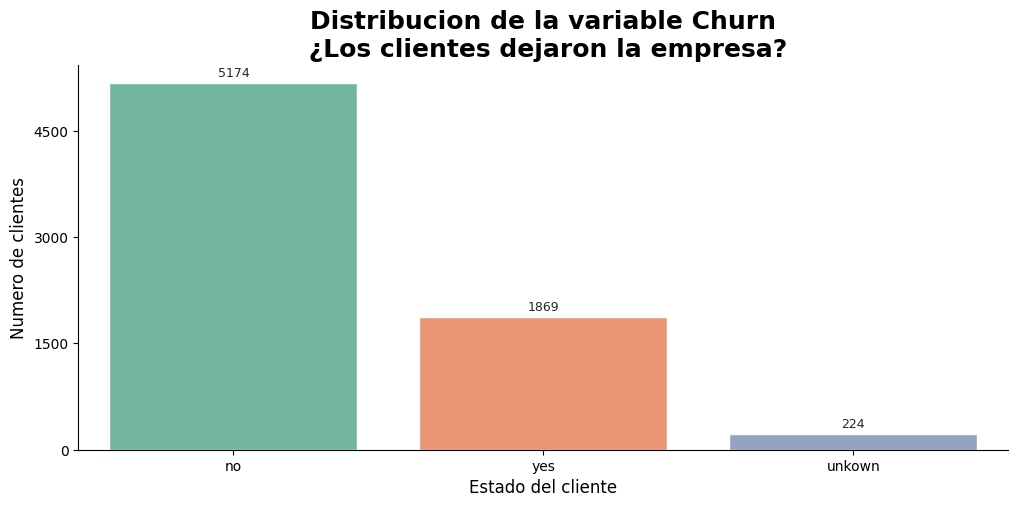

In [28]:
# Contar valores y eliminar el valor 'unknow' si existe
churn_counts = df_normalizado_customer['Churn'].value_counts()
churn_df = churn_counts.reset_index()
churn_df.columns = ['Churn', 'Total']
# Crear la gráfica
fig,ax= plt.subplots(figsize=(12,5))
sns.set_theme(style='white')
bars=sns.barplot(data=churn_df, x='Churn', y='Total',hue='Churn', palette='Set2', legend=False)
for bar in bars.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, height + 50, f'{int(height)}', ha='center', va='bottom', fontsize=9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_locator(plt.MultipleLocator(1500))


ax.set_title('Distribucion de la variable Churn\n ¿Los clientes dejaron la empresa?',fontweight="bold",fontsize=18)
ax.set_xlabel('Estado del cliente',fontsize=12)
ax.set_ylabel('Numero de clientes',fontsize=12)


plt.show()

In [31]:
df_normalizado_customer.columns

Index(['customerID', 'Churn', 'genero del cliente', 'cliente senior',
       'cliente con pareja', 'cliente con dependientes',
       'Meses de contrato del cliente', 'cliente con servicio telefonico',
       'cliente con multiples lineas', 'servicio de internet',
       'seguridad en linea', 'backup en linea', 'proteccion de dispositivo',
       'soporte tecnico', 'streaming tv', 'streaming movies',
       'Tipo de contrato', 'Facturacion en linea', 'Metodo de pago',
       'costo mensual', 'costo total', 'costos diarios'],
      dtype='object')

In [33]:
columna_categoricas= [
    'genero del cliente',
    'cliente senior',
    'cliente con pareja',
    'cliente con dependientes',
    'cliente con servicio telefonico',
    'cliente con multiples lineas',
    'servicio de internet',
]

for i, columns in enumerate(columna_categoricas):
  sns.set_theme(style='white')
  fig,ax= plt.subplots(figsize=(12,5))
  sns.countplot(data=df_normalizado_customer,x=columns,hue='Churn',palette='Set2')
   axs[i].set_title(f'{columna}')
   axs[i].set_xlabel('')
   axs[i].set_ylabel('Clientes')
   axs[i].tick_params(axis='x', rotation=45)
   axs[i].legend(title='Churn', loc='upper right')

IndentationError: unexpected indent (<ipython-input-33-2918211032>, line 15)

ValueError: Could not interpret value `customer.gender` for `x`. An entry with this name does not appear in `data`.

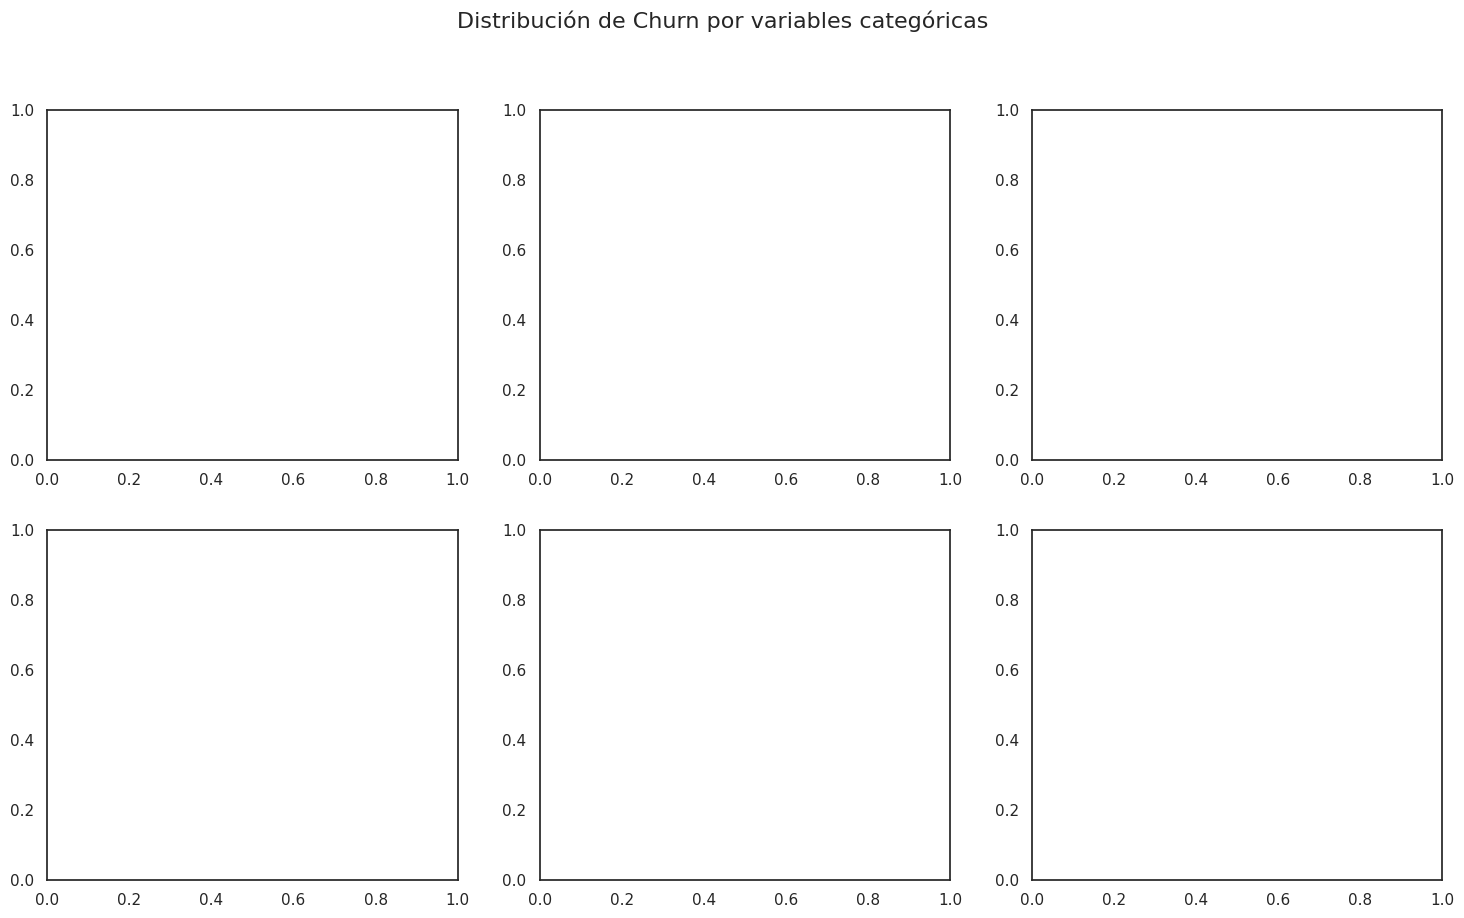

In [35]:
# Lista de columnas categóricas que quieres analizar
columnas_categoricas = [
    'customer.gender',
    'account.Contract',
    'account.PaymentMethod',
    'internet.InternetService',
    'phone.MultipleLines',
    'internet.TechSupport'
]

# Crear figure y axes para 6 gráficos (2 filas x 3 columnas)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribución de Churn por variables categóricas', fontsize=16)

# Flatten axs para iterar fácilmente
axs = axs.flatten()

# Crear cada gráfico
for i, columna in enumerate(columnas_categoricas):
    sns.countplot(data=df_normalizado_customer, x=columna, hue='Churn', palette='Set2', ax=axs[i])
    axs[i].set_title(f'{columna}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Clientes')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend(title='Churn', loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste del layout para dejar espacio al título
plt.show()

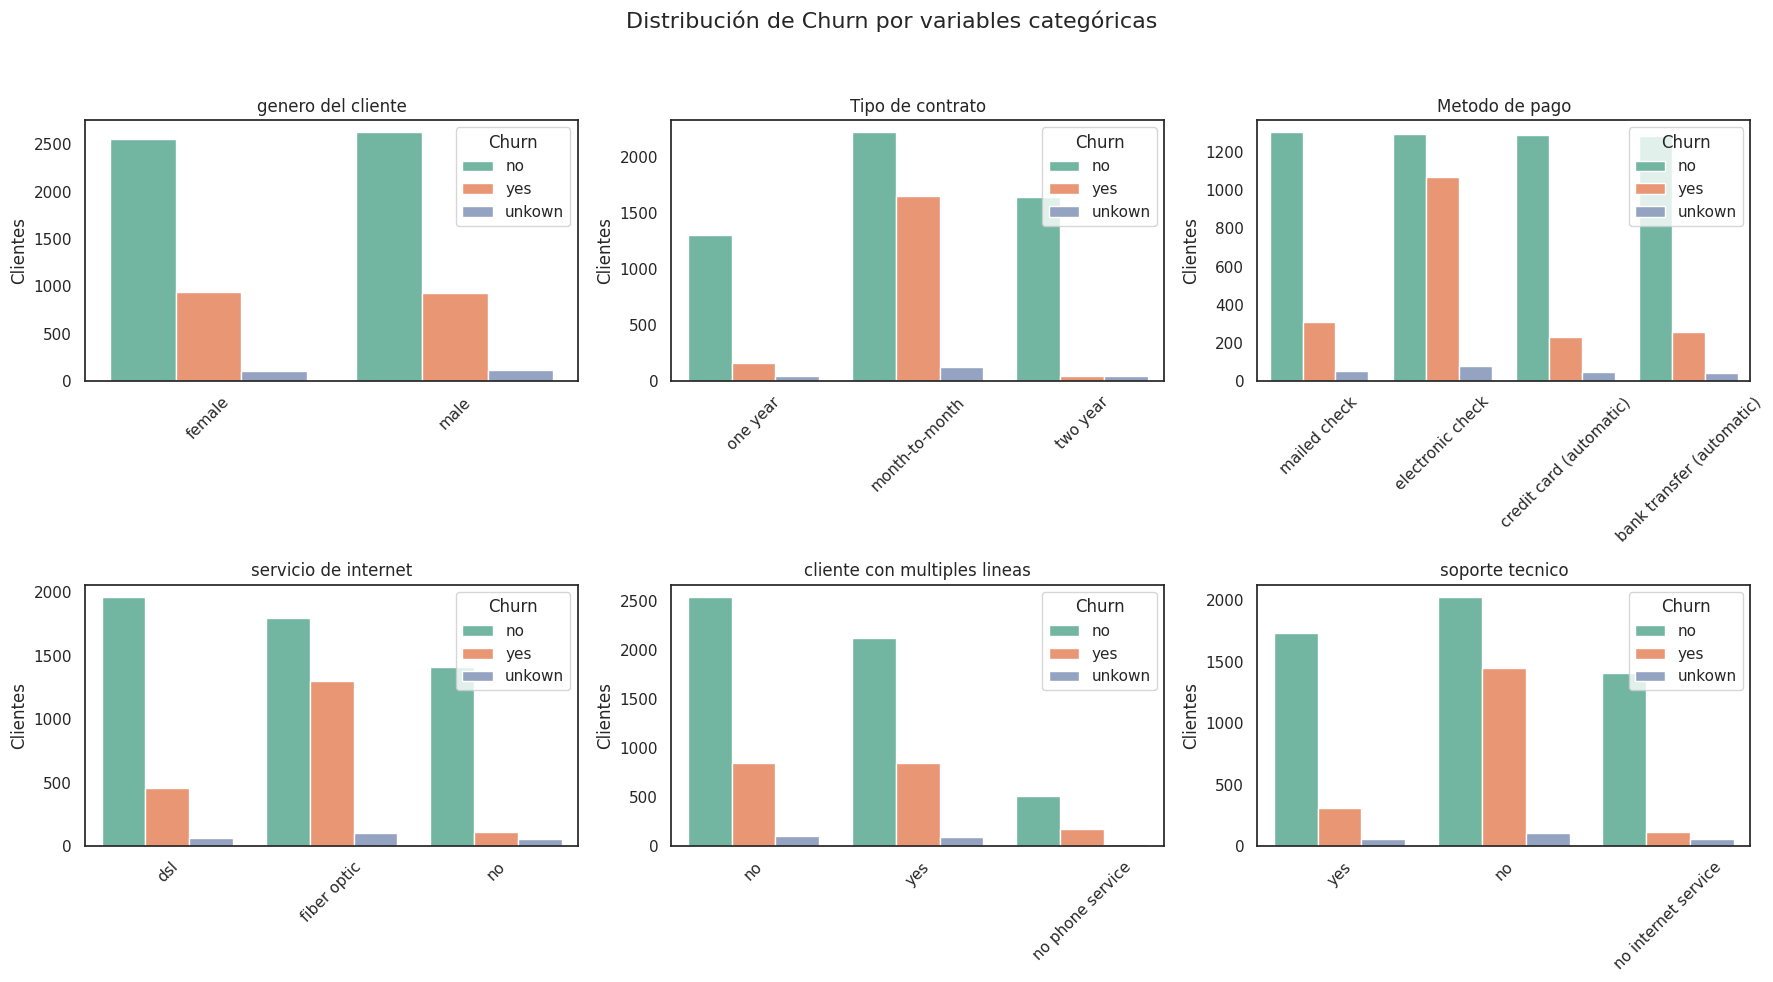

In [36]:
# Lista de columnas categóricas que quieres analizar (actualizada con los nombres renombrados)
columnas_categoricas = [
    'genero del cliente',
    'Tipo de contrato',
    'Metodo de pago',
    'servicio de internet',
    'cliente con multiples lineas',
    'soporte tecnico'
]

# Crear figure y axes para 6 gráficos (2 filas x 3 columnas)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribución de Churn por variables categóricas', fontsize=16)

# Flatten axs para iterar fácilmente
axs = axs.flatten()

# Crear cada gráfico
for i, columna in enumerate(columnas_categoricas):
    sns.countplot(data=df_normalizado_customer, x=columna, hue='Churn', palette='Set2', ax=axs[i])
    axs[i].set_title(f'{columna}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Clientes')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend(title='Churn', loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste del layout para dejar espacio al título
plt.show()

#📄Informe final